# Downside Risk

In [2]:
import pandas as pd
import numpy as np

In [3]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [4]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [5]:
prices.iloc[1:].values

array([[ 8.91, 11.08],
       [ 8.71, 10.71],
       [ 8.43, 11.59],
       [ 8.73, 12.11]])

In [7]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [11]:
d1 = pd.read_csv("data/sample_prices.csv")
returns = d1.pct_change()
returns.dropna()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [17]:
deviations = returns - returns.mean()
std_deviations = np.sqrt((deviations**2).mean())
std_deviations

BLUE      0.022957
ORANGE    0.076212
dtype: float64

# Annualizing Volatility
Volatility in a unit time period * sqrt(T) = Volatility (T)

In [88]:
annualized_volatility_BO = std_deviations*np.sqrt(12)
# since above voolatility is an annualized one
annualized_volatility_BO

BLUE      0.079524
ORANGE    0.264008
dtype: float64

# Reading Data for risk calculation

In [3]:
monthly_returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",parse_dates=True,header=0,index_col=0,na_values=-99.99)
monthly_returns

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


<AxesSubplot:>

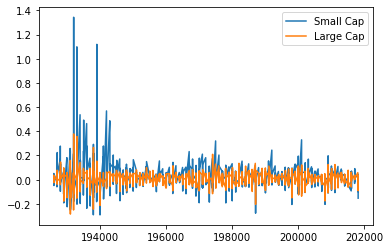

In [118]:
returns = monthly_returns[["Lo 10","Hi 10"]]/100
returns.columns = ["Small Cap","Large Cap"]
returns.plot()

In [93]:
annualized_volatility = returns.std()*np.sqrt(12)
annualized_volatility

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

Compute the annualized returns

In [71]:
annualized_returns = returns.std()*np.sqrt(12)
annualized_returns

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

This is a monthly return series with "n" no of months given by length of the matrix. We find the monthly returns of the series and then annualize the returns.
n period returns = Mul(returns_i + 1)^(1/n) - 1
 

In [72]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

In [78]:
annualized_return = ((return_per_month+1)**(12))-1
annualized_return*100

Small Cap    16.746329
Large Cap     9.280968
dtype: float64

Same returns can be derived by simplay multiplying the returns and taking power of (n/12 periods)

In [82]:
annualized_return = (1+returns).prod()**(12/n_months) - 1
annualized_return*100

Small Cap    16.746329
Large Cap     9.280968
dtype: float64

## Risk Adjusted Returns 

In [95]:
annualized_return/annualized_volatility

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

# Sharpe ratio

In [117]:
risk_free = 0.03
excess_return = (annualized_return-risk_free)
sharpe_ratio = excess_return/annualized_volatility
sharpe_ratio

Small Cap    0.373346
Large Cap    0.336392
dtype: float64

# Maximum Drawdowns

In [119]:
returns.index = pd.to_datetime(returns.index ,format="%Y%m")
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [120]:
returns.index = returns.index.to_period('M')
returns.head()

,Small Cap,Large Cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [121]:
returns.describe()

,Small Cap,Large Cap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

Maximum Drawdown is maximum loss from pervious high to subsequent low

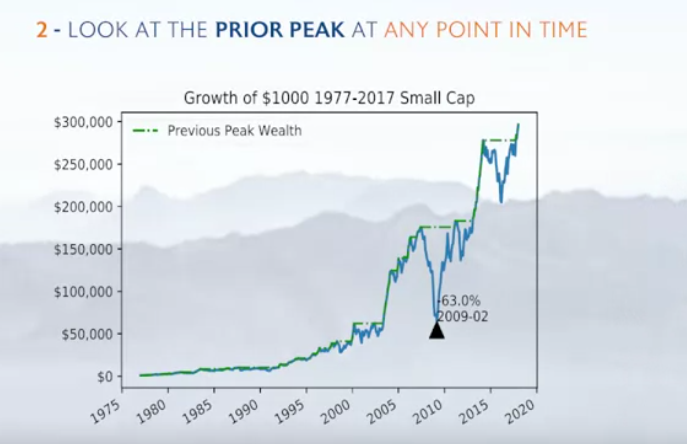

### What is Drawdown
We're looking for the prior peak at any point and seeing how far we are from this peak - this is called the drawdown
We can use this drawdown to check how long it takes to recover from a peak and also use this as a risk measure
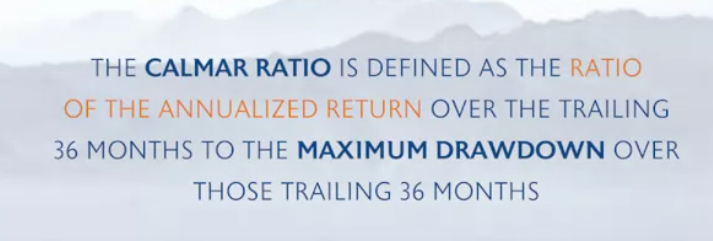

### Caution 
They are sensitive to outlier since it is dependent on two points
These metrics depend on frequency of data

In [126]:
# Indexing the large Cap Stocks
wealth_index = 1000*((1+returns["Large Cap"]).cumprod())
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: Large Cap, Length: 1110, dtype: float64

### Time series of previous peaks
Find the peaks of wealth index through cummax - this will help find peaks in data , where each col/row is populated by previous max values

<AxesSubplot:>

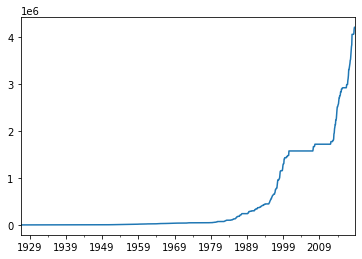

In [128]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

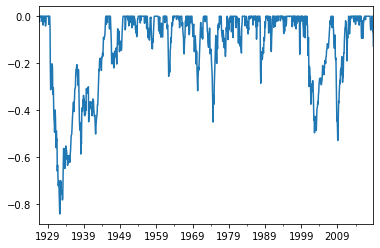

In [130]:
drawdown  = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

## Creating a drawdown function

<AxesSubplot:title={'center':'Small Cap'}>

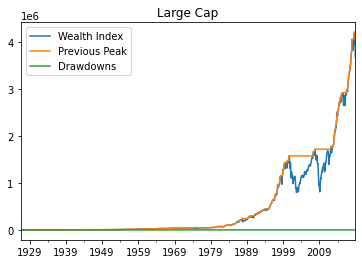

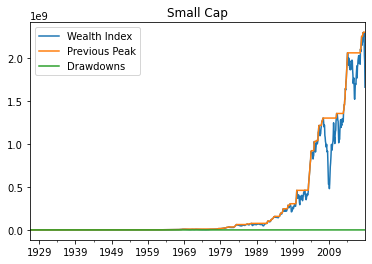

In [138]:
def drawdown_function(returns_series : pd.Series):
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth Index":wealth_index , "Previous Peak":previous_peaks,"Drawdowns":drawdown})

drawdown_function(returns["Large Cap"]).plot(title = "Large Cap")
drawdown_function(returns["Small Cap"]).plot(title = "Small Cap")

Since the contents of modules dont usually change very much (except during module development) Python is smart about importing modules and once a module is imported, it doesnt bother re-importing the module. Normally, this is what you want, but in our case when we are developing the module we want to force the module to geet automatically reloaded everytime it changes.

Fortunately, there is a _magic_ command sequence that does exactly that. First, we have to load an extension called `autoreload` by executing the _magic command_ `%load_ext autoreload`. Once you have loaded that extension, you now have access to a new _magic command_ called `%autoreload` which supports different modes of autoreload. The mode we want for now is to automatically reload anything that changes, which is mode 2. So, you need to execute:

```python
%load_ext autoreload
%autoreload 2
```

Now try executing:

```python
h.message
```


# Deviations from Normality

code for skewness and kurtosis to check for deviations from Normality

In [168]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import risk_kit as rk
hfi = rk.get_hfi_returns()
hfi.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/01/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28/02/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/03/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/04/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [149]:
summary_hfi = pd.concat([hfi.mean() , hfi.median(),hfi.mean()>hfi.median()],axis = 1)
summary_hfi

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


## Skewness
Intuitively, a negative skew means that you get more negative returns than you would have expected if the returns were distributed like the normal distribution.

Now, let's develop the code to compute the skewness of a series of numbers.

 skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$


In [153]:
def skewness(returns):
    returns_demeaned = returns - returns.mean()
    sigma_r = returns.std()
    skew = (returns_demeaned**3).mean()/(sigma_r**3)
    return skew

skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.917868
Convertible Arbitrage    -2.624552
Equity Market Neutral    -2.112330
Relative Value           -1.805125
Event Driven             -1.401124
Merger Arbitrage         -1.312562
Distressed Securities    -1.293430
Emerging Markets         -1.160418
Long/Short Equity        -0.388003
Funds Of Funds           -0.359722
CTA Global                0.172709
Short Selling             0.763599
Global Macro              0.977321
dtype: float64

## Kurtosis

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

In [154]:
def kurtosis(returns):
    returns_demeaned = returns - returns.mean()
    sigma_r = returns.std()
    skew = (returns_demeaned**4).mean()/(sigma_r**4)
    return skew

kurtosis(hfi).sort_values()

CTA Global                 2.930547
Long/Short Equity          4.489556
Global Macro               5.698099
Short Selling              6.071337
Funds Of Funds             7.016490
Distressed Securities      7.830098
Event Driven               7.974835
Merger Arbitrage           8.672620
Emerging Markets           9.180574
Relative Value            12.029207
Equity Market Neutral     17.087865
Convertible Arbitrage     23.104130
Fixed Income Arbitrage    29.615694
dtype: float64

## Jaques Berra Test for Kurtosis



In [156]:
import scipy.stats
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

The first number is the test statistic and the second number is the one we want. It represents the p-value for the hypothesis test. If you want to run the test at a 1% level of significance, you want this number to be greater than 0.01 to accept the hypothesis that the data is normally distributed, and if that number is less than 0.01 then you must reject the hypothesis of normality.

In this case, since we got a number higher than 0.01 we can accept the hypothesis that the numbers are random. Now, let's try this on our different hedge fund indices.

However , the funciton is applied to data frame collectively instead of row wise 

In [161]:
# checking for normality using JBT - add to risk module as well
import scipy.stats

def is_normal(r,level=0.01):
    # applies the is_normal function recursively 
    if isinstance(r,pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        # base case when only only series is present
        stat , p_value = scipy.stats.jarque_bera(r)
        return p_value > level

is_normal(hfi).sort_values()

Convertible Arbitrage     False
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
CTA Global                 True
dtype: bool

# Downside Measures: SemiDeviation, VaR and CVaR

We're going to look at a few measures of downside risk. We've already seen how to compute drawdowns, but we're going to look at 3 popular measures, and we are going to develop code to compute these and add them to our toolbox.

The first measure is the simplest, which is the semideviation, which is nothing more than the volatility of the subset of returns that are negative.

The code is very simple:

```python
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)
```


In [173]:
import pandas as pd
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

hfi_returns = rk.get_hfi_returns()
# print(hfi_returns)
semideviation = rk.semideviation(hfi_returns)
print(semideviation)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64


C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/01/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28/02/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/03/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/04/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\swapn\anaconda3\lib

In [175]:
ffme_ret = rk.get_ffme_returns()
rk.semideviation(ffme_ret).sort_values()

LargeCap    0.040245
SmallCap    0.051772
dtype: float64

# VaR and CVaR

We'll look at three different ways to compute Value At Risk

1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

To compute the historic VaR at a certain level, say 5%, all we have to do is to find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. In other words, we want the 5 percentile return.



In [195]:
import pandas as pd
from typing import Union

def var_historic(r : Union[pd.DataFrame, pd.Series] ,level=5):
    if isinstance(r,pd.DataFrame):
        return r.aggregate(var_historic,level=level)
    else:
        return -np.percentile(r,level)

print(var_historic(ffme_ret,level=5))
print(var_historic(hfi_returns,level = 1))

SmallCap    0.107650
LargeCap    0.075295
dtype: float64
Convertible Arbitrage     0.031776
CTA Global                0.049542
Distressed Securities     0.046654
Emerging Markets          0.088466
Equity Market Neutral     0.018000
Event Driven              0.048612
Fixed Income Arbitrage    0.041672
Global Macro              0.024316
Long/Short Equity         0.049558
Merger Arbitrage          0.025336
Relative Value            0.026660
Short Selling             0.113576
Funds Of Funds            0.039664
dtype: float64


## Conditional VaR

mean of the return values under level %

In [197]:
import pandas as pd
import numpy as np
from typing import Union

def con_var_historic(r : Union[pd.DataFrame,pd.Series], level = 5):
    """
    Mean of all values below "level" percentile in return series
    """
    if isinstance(r,pd.DataFrame):
        return r.aggregate(con_var_historic,level = level)
    else:
        isbeyond = r <= var_historic(r,level = level)
        return -r[isbeyond].mean()


con_var_historic(ffme_ret)

SmallCap    0.002643
LargeCap   -0.002131
dtype: float64

## Paramteric VaR

Assumes Normal distribution of asset returns 


## Cornish-Fisher Modification

The Cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns arent normal, we know that z-score will give us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modifed z-score. e.g. intuitively, all other things being equal, if the skewness is negative, we'll decrease the z-score further down, and if the skewness is positive, we'll push it up.

The adjusted z-score which we'll call $z_{cornishfisher}$ given by:

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$

In [216]:
from scipy import stats
from typing import Union

def var_gaussian(r : Union[pd.DataFrame,pd.Series],level=5,modified = False):
    """
    calculate basis volatility of return series
    """

    if isinstance(r,pd.DataFrame):
        return r.aggregate(var_gaussian,level = 5,modified=modified)    
    else:
        if modified:
            z = stats.norm.ppf(level/100)
            s = skewness(r)
            k = kurtosis(r)
            z_score = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36)
        else:
            z_score = stats.norm.ppf(level/100)
    return -(r.mean() + z_score*r.std(ddof=0))


var_gaussian(ffme_ret)

SmallCap    0.157152
LargeCap    0.079748
dtype: float64

<AxesSubplot:title={'center':'Hedge Fund indices at 5% Var'}>

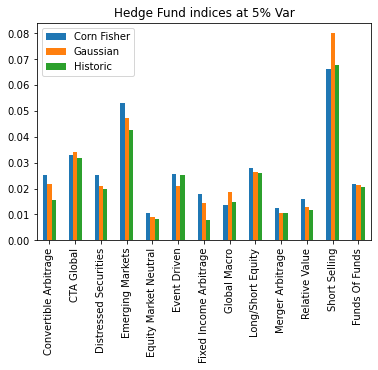

In [219]:
var_table = [var_gaussian(hfi_returns,modified=True),var_gaussian(hfi_returns),var_historic(hfi_returns)]
comparison = pd.concat(var_table,axis=1)
comparison.columns= ["Corn Fisher" ,"Gaussian","Historic"]
comparison.plot.bar(title = "Hedge Fund indices at 5% Var")